In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
import DataLoader

Train Size: 56000 	Test Size: 14000
Feature Size: 784
		Class Distribution:
Label: 0	Train Set: 5522	Test Set: 1381
Label: 1	Train Set: 6302	Test Set: 1575
Label: 2	Train Set: 5592	Test Set: 1398
Label: 3	Train Set: 5713	Test Set: 1428
Label: 4	Train Set: 5459	Test Set: 1365
Label: 5	Train Set: 5050	Test Set: 1263
Label: 6	Train Set: 5501	Test Set: 1375
Label: 7	Train Set: 5834	Test Set: 1459
Label: 8	Train Set: 5460	Test Set: 1365
Label: 9	Train Set: 5567	Test Set: 1391


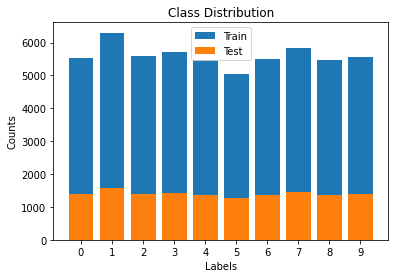

In [8]:
x_train,x_test,y_train,y_test = DataLoader.get_data(display_details=True)

In [9]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

x_train_scaled = standard_scaler.fit_transform(x_train)
x_train_min_max = min_max_scaler.fit_transform(x_train)

x_test_scaled = standard_scaler.fit_transform(x_test)
x_test_min_max = min_max_scaler.fit_transform(x_test)

In [10]:
# For Standard Scaled 
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_test_scaled)
    print('Classification report for number of k (test_data): ',i)
    print(classification_report(y_test,y_pred))

Classification report for number of k (test_data):  1
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1381
           1       0.97      0.99      0.98      1575
           2       0.96      0.94      0.95      1398
           3       0.94      0.95      0.94      1428
           4       0.95      0.93      0.94      1365
           5       0.94      0.93      0.93      1263
           6       0.97      0.97      0.97      1375
           7       0.94      0.95      0.95      1459
           8       0.96      0.92      0.94      1365
           9       0.90      0.92      0.91      1391

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Classification report for number of k (test_data):  2
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1381
           1       0.95 

In [27]:
# Comparing Min-Max with Standart Scaler Test set
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(x_train_min_max,y_train)
y_pred = knn.predict(x_test_min_max)
print('Classification report for number of k (test_data): ',3)
print(classification_report(y_test,y_pred))

Classification report for number of k (test_data):  3
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.97      0.99      0.98      1575
           2       0.98      0.97      0.98      1398
           3       0.97      0.97      0.97      1428
           4       0.98      0.96      0.97      1365
           5       0.97      0.96      0.97      1263
           6       0.98      0.99      0.99      1375
           7       0.97      0.97      0.97      1459
           8       0.99      0.95      0.97      1365
           9       0.95      0.96      0.95      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



Selected n_neighbors = 3 with Min Max scaler for best results

---



In [28]:
cf_matrix = confusion_matrix(y_test, y_pred)

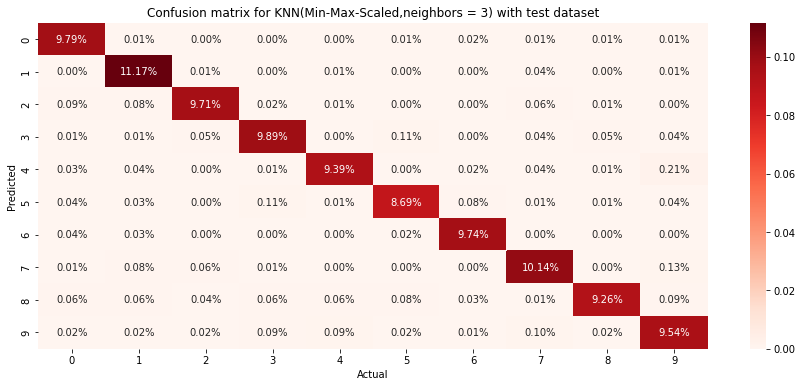

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for KNN(Min-Max-Scaled,neighbors = 3) with test dataset')
cf

In [15]:
# Standard Scaled
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_train_scaled)
    print('Classification report for number of k (train_data): ',i)
    print(classification_report(y_train,y_pred))

Classification report for number of k (train_data):  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5522
           1       1.00      1.00      1.00      6302
           2       1.00      1.00      1.00      5592
           3       1.00      1.00      1.00      5713
           4       1.00      1.00      1.00      5459
           5       1.00      1.00      1.00      5050
           6       1.00      1.00      1.00      5501
           7       1.00      1.00      1.00      5834
           8       1.00      1.00      1.00      5460
           9       1.00      1.00      1.00      5567

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000

Classification report for number of k (train_data):  2
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5522
           1       0.9

In [24]:
# Comparing Min-Max with Standart Scaler Train set
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(x_train_min_max,y_train)
y_pred = knn.predict(x_train_min_max)
print('Classification report for number of k (train_data): ',3)
print(classification_report(y_train,y_pred))

Classification report for number of k (train_data):  3
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5522
           1       0.98      1.00      0.99      6302
           2       0.99      0.98      0.99      5592
           3       0.98      0.99      0.98      5713
           4       0.99      0.98      0.99      5459
           5       0.99      0.98      0.98      5050
           6       0.99      0.99      0.99      5501
           7       0.98      0.99      0.99      5834
           8       1.00      0.96      0.98      5460
           9       0.98      0.98      0.98      5567

    accuracy                           0.99     56000
   macro avg       0.99      0.99      0.99     56000
weighted avg       0.99      0.99      0.99     56000



Selecting n_neighbors with 3 for train data and min_max scaler over standard scaler

In [25]:
cf_matrix = confusion_matrix(y_train, y_pred)

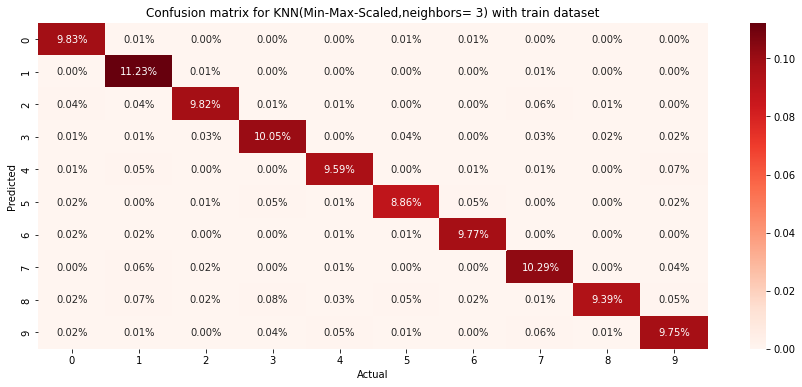

In [26]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for KNN(Min-Max-Scaled,neighbors= 3) with train dataset')
cf